## In this notebook, the results of experiment 2 are analyzed

In [1]:
import pandas as pd
import numpy as np
import re

In [29]:
main_df = pd.read_csv("exp_2_df_final_results.csv",  index_col=0)
main_df
#data = pd.read_csv(file_path, delimiter='\t')

,condition,Deelnemer_ID,Date submitted,Page 2 duration,Ik heb de taak snel uitgevoerd,Ik had moeite om de taak succesvol uit te voeren,Ik zie mijzelf als de maker van het radiobericht,Ik ben tevreden met mijn gecreeërde radio-bericht,Door bovenstaande limitaties is het niet mogelijk om conclusies te vertalen naar mijn echte werkzaamheden,Ik heb erop vertrouwd dat het suggestie radio-bericht feitelijk correct was,Ik heb net zoveel vertrouwen in de suggestie als dat ik had gehad wanneer het door een collega geschreven was,Het suggestie radio-bericht heeft mij beinvloed op een of meerdere van de volgende manieren:,Het suggestie radio-bericht had mij meer geholpen als het ... was,Ik sta open om op deze manier mijn werk uit te voeren,Schrijf hier jouw radio-bericht:
NA_index,,,,,,,,,,,,,,,
"0,NASGRM,Deelnemer_B,2023-07-07 06:04:26.773,00:27:09,Neutraal,Neutraal,Neutraal,Neutraal,Lichtelijk eens,Lichtelijk oneens,Oneens,""Positief beïnvloed, sneller inspiratie gevonden om over te schrijven"",Een beetje langer,Lichtelijk oneens,""Het lijkt flink mis op een zorgboerderij in Holwierde in Groningen, waar kwetsbare mensen de dag doorbrengen. Medewerkers klagen volgens RTV Noord over seksuele intimidatie en een angstcultuur. Ze voelen zich onveilig omdat de eigenaar ze continu in de gaten houdt met camera's. Verder zouden er allerlei vunzige opmerkingen worden gemaakt en kreeg een vrouwelijke medewerker seksspeeltjes in haar kerstpakket. De Groningse GGD is een onderzoek begonnen. """,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Only NA,Deelnemer_A,2023-06-30 06:33:06.020,00:06:52,Eens,Oneens,Eens,Helemaal mee eens,Neutraal,NaN,NaN,NaN,NaN,NaN,De GGD onderzoekt klachten over seksuele intim...
"0,Only SGRM,Deelnemer_C,2023-07-05 05:36:18.983,00:02:35,Helemaal mee eens,Helemaal mee oneens,Helemaal mee eens,Helemaal mee eens,Helemaal mee eens,,Lichtelijk eens,""Negatief beïnvloed, de suggestie behoefde zoveel aanpassingen dat het alleen zorgde voor extra ruis"",Langer,Oneens,De GGD onderzoekt of mensen op een zorgboerderij in Groningen seksueel geïntimeerd worden. RTV Noord heeft ook signalen van een angstcultuur. Medewerkers voelen zich onveilig omdat ze in de gaten worden gehouden met camera's. Een vrouwelijke werknemer zegt dat ze seksspeeltjes kreeg met kerst. De eigenaar ontkent de beschuldigingen.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1,NASGRM,Deelnemer_A,2023-06-30 07:15:43.157,00:10:15,Lichtelijk eens,Lichtelijk oneens,Lichtelijk eens,Eens,Neutraal,Lichtelijk eens,Eens,""Positief beïnvloed, sneller inspiratie gevonden om over te schrijven"",Neutraal (perfecte lengte),Neutraal,""Het schiet niet op met de omschakeling naar een kringloopeconomie, zegt het Planbureau voor de Leefomgeving. Bedrijven mogen nu zelf weten hoe duurzaam ze produceren, maar het bureau wil dat het kabinet het gaat verplichten. Dat kan bijvoorbeeld door een belasting op fossiele brandstoffen, en door een verplicht aandeel hergebruikte materialen in producten.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Only NA,Deelnemer_C,2023-07-05 05:49:59.707,00:12:28,Helemaal mee eens,Helemaal mee oneens,Helemaal mee eens,Helemaal mee eens,Helemaal mee oneens,NaN,NaN,NaN,NaN,NaN,Het kabinet moet meer doen om recycling aan te...
"1,Only SGRM,Deelnemer_B,2023-07-07 06:58:28.423,00:51:19,Helemaal mee oneens,Eens,Eens,Neutraal,Eens,,Oneens,""Negatief beïnvloed, de suggestie behoefde zoveel aanpassingen dat het alleen zorgde voor extra ruis"",Langer,Oneens,""Bedrijven die milieuvervuilende grondstoffen gebruiken voor hun producten moeten extra worden belast. Dat zegt een van de belangrijkste adviseurs van het kabinet, planbureau PBL. Nederland wil binnen dertig jaar helemaal circulair zijn, dus dat we geen grondstoffen meer gebruiken maar alles recyclen. Maar met het tempo van nu gaan we het niet redden en daarom moet het kabinet volgens het planbureau strenger worden.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [59]:
#
#main_df = pd.read_csv("exp_2_df_final_results.csv")
main_df = pd.read_excel("exp_2_df_final_results.xlsx" )
main_df
#print(main_df['NA_index'])

,NA_index,condition,Deelnemer_ID,Date submitted,Page 2 duration,Ik heb de taak snel uitgevoerd,Ik had moeite om de taak succesvol uit te voeren,Ik zie mijzelf als de maker van het radiobericht,Ik ben tevreden met mijn gecreeÃ«rde radio-bericht,Door bovenstaande limitaties is het niet mogelijk om conclusies te vertalen naar mijn echte werkzaamheden,Ik heb erop vertrouwd dat het suggestie radio-bericht feitelijk correct was,Ik heb net zoveel vertrouwen in de suggestie als dat ik had gehad wanneer het door een collega geschreven was,Het suggestie radio-bericht heeft mij beinvloed op een of meerdere van de volgende manieren:,Het suggestie radio-bericht had mij meer geholpen als het ... was,Ik sta open om op deze manier mijn werk uit te voeren,Schrijf hier jouw radio-bericht:
0,0,NASGRM,Deelnemer_B,2023-07-07 06:04:26.773,00:27:09,Neutraal,Neutraal,Neutraal,Neutraal,Lichtelijk eens,Lichtelijk oneens,Oneens,"Positief beÃ¯nvloed, sneller inspiratie gevond...",Een beetje langer,Lichtelijk oneens,Het lijkt flink mis op een zorgboerderij in Ho...
1,0,Only NA,Deelnemer_A,2023-06-30 06:33:06.020,00:06:52,Eens,Oneens,Eens,Helemaal mee eens,Neutraal,NaN,NaN,NaN,NaN,NaN,De GGD onderzoekt klachten over seksuele intim...
2,0,Only SGRM,Deelnemer_C,2023-07-05 05:36:18.983,00:02:35,Helemaal mee eens,Helemaal mee oneens,Helemaal mee eens,Helemaal mee eens,Helemaal mee eens,NaN,Lichtelijk eens,"Negatief beÃ¯nvloed, de suggestie behoefde zov...",Langer,Oneens,De GGD onderzoekt of mensen op een zorgboerder...
3,1,NASGRM,Deelnemer_A,2023-06-30 07:15:43.157,00:10:15,Lichtelijk eens,Lichtelijk oneens,Lichtelijk eens,Eens,Neutraal,Lichtelijk eens,Eens,"Positief beÃ¯nvloed, sneller inspiratie gevond...",Neutraal (perfecte lengte),Neutraal,Het schiet niet op met de omschakeling naar ee...
4,1,Only NA,Deelnemer_C,2023-07-05 05:49:59.707,00:12:28,Helemaal mee eens,Helemaal mee oneens,Helemaal mee eens,Helemaal mee eens,Helemaal mee oneens,NaN,NaN,NaN,NaN,NaN,Het kabinet moet meer doen om recycling aan te...
5,1,Only SGRM,Deelnemer_B,2023-07-07 06:58:28.423,00:51:19,Helemaal mee oneens,Eens,Eens,Neutraal,Eens,NaN,Oneens,"Negatief beÃ¯nvloed, de suggestie behoefde zov...",Langer,Oneens,Bedrijven die milieuvervuilende grondstoffen g...
6,2,NASGRM,Deelnemer_C,2023-07-05 06:00:11.043,00:08:53,Helemaal mee eens,Helemaal mee oneens,Helemaal mee eens,Helemaal mee eens,Helemaal mee eens,Eens,Neutraal,"Neutraal, ik heb er geen aandacht aan besteedt.",Veel langer,Oneens,Er wordt op Terschelling niet meer gezocht naa...
7,2,Only NA,Deelnemer_B,2023-07-07 07:21:42.610,00:19:43,Lichtelijk eens,Oneens,Eens,Lichtelijk eens,Lichtelijk eens,NaN,NaN,NaN,NaN,NaN,Er is opnieuw de hele dag gezocht naar de jong...
8,2,Only SGRM,Deelnemer_A,2023-06-30 08:27:58.763,00:02:53,Helemaal mee eens,Lichtelijk oneens,Lichtelijk eens,Oneens,Eens,NaN,Lichtelijk oneens,"Negatief beÃ¯nvloed, mijn denkrichting werd er...",Veel langer,Helemaal mee oneens,De reddingsdiensten zijn gestopt met zoeken na...
9,3,NASGRM,Deelnemer_B,2023-07-07 07:32:55.183,00:09:15,Eens,Oneens,Eens,Eens,Neutraal,Lichtelijk oneens,Oneens,"Neutraal, ik heb er geen aandacht aan besteedt.",Neutraal (perfecte lengte),Neutraal,Nederland heeft samen met de marine van Colomb...


## Turn Likert data into numerical

In [60]:
replacer = {'Helemaal mee oneens': 1, 'Oneens': 2,
            'Lichtelijk oneens': 3,
            'Neutraal': 4, 'Lichtelijk eens': 5, 'Eens' : 6, 'Helemaal mee eens' : 7}


# Select String Columns
cols = main_df.columns[main_df.dtypes == 'object']
# Replace Values in those Columns
main_df[cols] = main_df[cols].replace(replacer)

## Turn duration column into integer

In [61]:
main_df['duration'] = pd.to_timedelta(main_df['Page 2 duration']).dt.total_seconds()
print(main_df)
main_df['duration'] = main_df['duration'].astype(int)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\tslibs\timedeltas.pyx", line 436, in pandas._libs.tslibs.timedeltas.array_to_timedelta64
  File "pandas\_libs\tslibs\timedeltas.pyx", line 468, in pandas._libs.tslibs.timedeltas._item_to_timedelta64_fastpath
TypeError: Expected unicode, got datetime.time

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\20183274\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\20183274\AppData\Local\Temp\ipykernel_20828\1095751726.py", line 1, in <module>
    main_df['duration'] = pd.to_timedelta(main_df['Page 2 duration']).dt.total_seconds()
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\20183274\AppData\Roaming\Python\Python311\site-packages\pandas-2.0.0rc0-py3.11-win-amd64.egg\pandas\core\tools\timedeltas.py",

## Rename columns so that they do not contain spaces

In [62]:
main_df = main_df.rename(columns={'Ik heb de taak snel uitgevoerd': 'Ikhebdetaaksneluitgevoerd', 'Ik had moeite om de taak succesvol uit te voeren': 
                                 "Ikhadmoeiteomdetaaksuccesvoluittevoeren", "Ik zie mijzelf als de maker van het radiobericht":
                                 "Ikziemijzelfalsdemakervanhetradiobericht", "Ik ben tevreden met mijn gecreeërde radio-bericht": 
                                 "Ikbentevredenmetmijngecreeërderadiobericht", "Door bovenstaande limitaties is het niet mogelijk om conclusies te vertalen naar mijn echte werkzaamheden": 
                                 "Doorbovenstaandelimitatiesishetnietmogelijkomconclusiestevertalennaarmijnechtewerkzaamheden",
                                 "Ik heb erop vertrouwd dat het suggestie radio-bericht feitelijk correct was": "Ikheberopvertrouwddathetsuggestieradio-berichtfeitelijkcorrectwas",
                                 "Ik heb net zoveel vertrouwen in de suggestie als dat ik had gehad wanneer het door een collega geschreven was": 
                                 "Ikhebnetzoveelvertrouwenindesuggestiealsdatikhadgehadwanneerhetdooreencollegageschrevenwas",
                                 "Het suggestie radio-bericht heeft mij beinvloed op een of meerdere van de volgende manieren:":
                                 "Hetsuggestieradio-berichtheeftmijbeinvloedopeenofmeerderevandevolgendemanieren:",
                                 "Het suggestie radio-bericht had mij meer geholpen als het ... was": 
                                 "Hetsuggestieradio-berichthadmijmeergeholpenalshet...was",
                                 "Ik sta open om op deze manier mijn werk uit te voeren":
                                 "Ikstaopenomopdezemaniermijnwerkuittevoeren",
                                 "Schrijf hier jouw radio-bericht:": "Schrijfhierjouwradio-bericht:"})

## replace strings to integers

In [63]:
subset_without_onlyna = main_df[main_df.condition != 'Only NA']
subset_only_nasgrm = main_df[main_df.condition == 'NASGRM']

In [64]:
replacerid = {'Only NA': 1, 'NASGRM': 2,
            'Only SGRM': 3}
replacerdeel = {'Deelnemer_A': 1, 'Deelnemer_B': 2,
            'Deelnemer_C': 3}
# Select String Columns
cols = subset_only_nasgrm.columns[subset_only_nasgrm.dtypes == 'object']
# Replace Values in those Columns
main_df[cols] = main_df[cols].replace(replacerid)
main_df[cols] = main_df[cols].replace(replacerdeel)

In [65]:
main_df.to_csv("exp_2_R_analysis_results.csv", index=False)

# Import final dataframe | {'Only NA': 1, 'NASGRM': 2, Only SGRM : 3}
        

In [66]:
import pandas as pd
main_df = pd.read_csv("exp_2_R_analysis_results.csv")
#main_df.at[13,'Schrijfhierjouwradio-bericht:'] = 'Motoren, brommers en bromfietsen worden weer vaker gestolen. In de eerste zeven maanden werden ruim een derde meer diefstallen gepleegd vergeleken met vorig jaar. Vooral motoren zijn populair, wat kan komen door het gebrek aan parkeerruimte in steden, of door de dure benzine.'


In [68]:
main_df.columns

Index(['NA_index', 'condition', 'Deelnemer_ID', 'Date submitted',
       'Page 2 duration', 'Ikhebdetaaksneluitgevoerd',
       'Ikhadmoeiteomdetaaksuccesvoluittevoeren',
       'Ikziemijzelfalsdemakervanhetradiobericht',
       'Ik ben tevreden met mijn gecreeÃ«rde radio-bericht',
       'Doorbovenstaandelimitatiesishetnietmogelijkomconclusiestevertalennaarmijnechtewerkzaamheden',
       'Ikheberopvertrouwddathetsuggestieradio-berichtfeitelijkcorrectwas',
       'Ikhebnetzoveelvertrouwenindesuggestiealsdatikhadgehadwanneerhetdooreencollegageschrevenwas',
       'Hetsuggestieradio-berichtheeftmijbeinvloedopeenofmeerderevandevolgendemanieren:',
       'Hetsuggestieradio-berichthadmijmeergeholpenalshet...was',
       'Ikstaopenomopdezemaniermijnwerkuittevoeren',
       'Schrijfhierjouwradio-bericht:'],
      dtype='object')

In [67]:
print(main_df[['condition',  'Deelnemer_ID','duration']])

KeyError: "['duration'] not in index"

## Inspect the time per condition, news article, and participant

In [6]:
mean_duration_per_deelnemer = main_df.groupby('Deelnemer_ID')['duration'].mean()

print(mean_duration_per_deelnemer)

Deelnemer_ID
1     328.500000
2    1562.833333
3     347.833333
Name: duration, dtype: float64


In [7]:
filter_df = main_df[main_df['Deelnemer_ID'] != 2]
mean_duration_per_condition = filter_df.groupby('condition')['duration'].mean()

print(mean_duration_per_condition)

filter_df = main_df[main_df['Deelnemer_ID'] != 2]
mean_duration_per_condition = filter_df.groupby('condition')['duration'].mean()

print(mean_duration_per_condition)



# NARM average words: 231 + 418 + 218 + 252= 280
# NA average: 363 + 265 + 187 + 296 = 277.8
# RM average: 40 + 42 + 51 + 77 = 52.5



condition
1    427.5
2    425.5
3    161.5
Name: duration, dtype: float64
condition
1    427.5
2    425.5
3    161.5
Name: duration, dtype: float64


In [8]:
filter_df = main_df[main_df['Deelnemer_ID'] != 2]
mean_duration_per_condition = filter_df.groupby('NA_index')['duration'].mean()

print(mean_duration_per_condition)

NA_index
0    283.5
1    681.5
2    353.0
3    255.5
4    286.0
8    169.5
Name: duration, dtype: float64


In [9]:
filter_df = main_df[main_df['Deelnemer_ID'] != 2]
mean_duration_per_condition = filter_df[['NA_index', 'condition','duration']]

print(mean_duration_per_condition)

    NA_index  condition  duration
1          0          1       412
2          0          3       155
3          1          2       615
4          1          1       748
6          2          2       533
8          2          3       173
10         3          1       314
11         3          3       197
12         4          2       336
13         4          1       236
15         8          2       218
17         8          3       121


In [ ]:
# In every scenario, condition 2 took more time than condition 3. Condition 1 took more time than condition 3.
# Condition 1 took more time than condition 2.



                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.1597 2.0000 10.0000 0.8546



In [23]:
from statsmodels.stats.anova import AnovaRM
# Conduct the repeated measures ANOVA
print(AnovaRM(data=main_df, depvar='Ikbentevredenmetmijngecreeërderadiobericht',
              subject='NA_index', within=['condition']).fit())

# statistical difference in mean response times between the conditions


# Interpreting F value:
# https://www.geeksforgeeks.org/how-to-perform-a-repeated-measures-anova-in-python/

# https://www.researchgate.net/post/How_to_write_the_results_of_repeated_measures_ANOVA_and_what_is_the_meaning_of_the_F_value#:~:text=The%20F%2Dvalue%20in%20a,the%20variance%20within%20the%20groups.



                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  2.0039 2.0000 10.0000 0.1854



In [22]:
from statsmodels.stats.anova import AnovaRM
# Conduct the repeated measures ANOVA
print(AnovaRM(data=main_df, depvar='Ikbentevredenmetmijngecreeërderadiobericht',
              subject='NA_index', within=['Deelnemer_ID']).fit())
# This shows that the deelnemer_ID does have a significant effect on which score is given.


                  Anova
             F Value Num DF  Den DF Pr > F
------------------------------------------
Deelnemer_ID  6.1801 2.0000 10.0000 0.0179



In [24]:
print(AnovaRM(data=main_df, depvar='Ikziemijzelfalsdemakervanhetradiobericht',
              subject='NA_index', within=['Deelnemer_ID']).fit())
# This shows that the deelnemer_ID does have a significant effect on which score is given.


                  Anova
             F Value Num DF  Den DF Pr > F
------------------------------------------
Deelnemer_ID  8.2353 2.0000 10.0000 0.0077



In [25]:
print(AnovaRM(data=main_df, depvar='Ikhadmoeiteomdetaaksuccesvoluittevoeren',
              subject='NA_index', within=['Deelnemer_ID']).fit())
# This shows that the deelnemer_ID does have a significant effect on which score is given.


                  Anova
             F Value Num DF  Den DF Pr > F
------------------------------------------
Deelnemer_ID  6.4970 2.0000 10.0000 0.0156



In [85]:
b = main_df.groupby('Deelnemer_ID')['Ikhadmoeiteomdetaaksuccesvoluittevoeren'].sum()


a = main_df[['Deelnemer_ID', 'Ikhadmoeiteomdetaaksuccesvoluittevoeren']]
c = a.sort_values('Deelnemer_ID')
print(b)
print(a)
print(c)

Deelnemer_ID
1    15
2    23
3     6
Name: Ikhadmoeiteomdetaaksuccesvoluittevoeren, dtype: int64
    Deelnemer_ID  Ikhadmoeiteomdetaaksuccesvoluittevoeren
0              2                                        4
1              1                                        2
2              3                                        1
3              1                                        3
4              3                                        1
5              2                                        6
6              3                                        1
7              2                                        2
8              1                                        3
9              2                                        2
10             1                                        2
11             3                                        1
12             1                                        2
13             3                                        1
14             2                 

In [41]:
a = main_df[['Deelnemer_ID', 'Ikziemijzelfalsdemakervanhetradiobericht']]
c = a.sort_values('Deelnemer_ID')
print(c)

    Deelnemer_ID  Ikziemijzelfalsdemakervanhetradiobericht
8              1                                         5
12             1                                         5
10             1                                         6
17             1                                         3
1              1                                         6
3              1                                         5
5              2                                         6
7              2                                         6
16             2                                         6
9              2                                         6
14             2                                         6
0              2                                         4
4              3                                         7
6              3                                         7
2              3                                         7
11             3                                        

In [42]:
a = main_df[['Deelnemer_ID', 'Ikhebdetaaksneluitgevoerd']]
c = a.sort_values('Deelnemer_ID')
print(c)

    Deelnemer_ID  Ikhebdetaaksneluitgevoerd
8              1                          7
12             1                          6
10             1                          6
17             1                          6
1              1                          6
3              1                          5
5              2                          1
7              2                          5
16             2                          5
9              2                          6
14             2                          1
0              2                          4
4              3                          7
6              3                          7
2              3                          7
11             3                          7
13             3                          7
15             3                          7


In [90]:
a = main_df[['Deelnemer_ID', 'condition', 'Doorbovenstaandelimitatiesishetnietmogelijkomconclusiestevertalennaarmijnechtewerkzaamheden']]
c = a.sort_values(['Deelnemer_ID', 'condition'])
#print(c)

In [89]:
filter_df = main_df[main_df['Deelnemer_ID'] == 3]
#print(filter_df)

In [87]:
filter_df = main_df[main_df['Deelnemer_ID'] == 2].sort_values(['Deelnemer_ID', 'condition'])
#print(filter_df)

In [88]:
filter_df = main_df[main_df['Deelnemer_ID'] == 1].sort_values(['Deelnemer_ID', 'condition'])
#print(filter_df)

# screenshot for overleaf

In [92]:
filtered = main_df.drop(columns= ['duration', 'Schrijfhierjouwradio-bericht:' , 'Date submitted', 'Page 2 duration'])
filter_df = filtered.sort_values(['condition' , 'Deelnemer_ID' ])
#print(filter_df)

#filter_df.to_html('experiment2_results.html')
#filter_df.to_csv("experiment2_results_for_overleaf.csv", index=False)

# Inspecting the agreements between the written RMs suggested RMs and NA

In [69]:
base_df = pd.read_excel("exp_3_df_input3.xlsx")
print(base_df)

   NA_index                                      news_articles   
0         0  De GGD Groningen is een onderzoek begonnen naa...  \
1         1  Het kabinet doet nog steeds te weinig om een k...   
2         2  Hulpdiensten en vrijwilligers hebben op Tersch...   
3         3  Tijdens acht verschillende operaties in de Car...   
4         4  Het aantal diefstallen van motoren, bromfietse...   
5         8  De nieuwe Braziliaanse president Luiz Inácio L...   

                                                rm_g   
0   Medewerkers van een zorgboerderij in het Gron...  \
1   Er komen strengere regels voor bedrijven om t...   
2   Vrijwilligers hebben zonder succes gezocht na...   
3   Op de Caribische Zee is bijna 10-duizend kilo...   
4   Er worden weer meer motoren, brommers en brom...   
5   In zijn eerste speech als president van Brazi...   

                                        suggested_rm  
0  De GGD Groningen doet onderzoek naar mogelijke...  
1  Het kabinet moet strenger ingri

In [70]:
merged_df = pd.merge(main_df, base_df, on='NA_index')

In [71]:
print(merged_df)  


    NA_index  condition  Deelnemer_ID           Date submitted   
0          0          2             2  2023-07-07 06:04:26.773  \
1          0          1             1  2023-06-30 06:33:06.020   
2          0          3             3  2023-07-05 05:36:18.983   
3          1          2             1  2023-06-30 07:15:43.157   
4          1          1             3  2023-07-05 05:49:59.707   
5          1          3             2  2023-07-07 06:58:28.423   
6          2          2             3  2023-07-05 06:00:11.043   
7          2          1             2  2023-07-07 07:21:42.610   
8          2          3             1  2023-06-30 08:27:58.763   
9          3          2             2  2023-07-07 07:32:55.183   
10         3          1             1  2023-06-30 12:51:11.620   
11         3          3             3  2023-07-05 06:04:45.660   
12         4          2             1  2023-06-30 12:59:00.070   
13         4          1             3  2023-07-05 06:11:43.263   
14        

In [72]:
df_rms = merged_df[['NA_index', 'condition', 'Deelnemer_ID', 'Schrijfhierjouwradio-bericht:', 'news_articles', 'rm_g', 'suggested_rm']]

In [73]:
df_rms

,NA_index,condition,Deelnemer_ID,Schrijfhierjouwradio-bericht:,news_articles,rm_g,suggested_rm
0,0,2,2,Het lijkt flink mis op een zorgboerderij in Ho...,De GGD Groningen is een onderzoek begonnen naa...,Medewerkers van een zorgboerderij in het Gron...,De GGD Groningen doet onderzoek naar mogelijke...
1,0,1,1,De GGD onderzoekt klachten over seksuele intim...,De GGD Groningen is een onderzoek begonnen naa...,Medewerkers van een zorgboerderij in het Gron...,De GGD Groningen doet onderzoek naar mogelijke...
2,0,3,3,De GGD onderzoekt of mensen op een zorgboerder...,De GGD Groningen is een onderzoek begonnen naa...,Medewerkers van een zorgboerderij in het Gron...,De GGD Groningen doet onderzoek naar mogelijke...
3,1,2,1,Het schiet niet op met de omschakeling naar ee...,Het kabinet doet nog steeds te weinig om een k...,Er komen strengere regels voor bedrijven om t...,Het kabinet moet strenger ingrijpen om zuinige...
4,1,1,3,Het kabinet moet meer doen om recycling aan te...,Het kabinet doet nog steeds te weinig om een k...,Er komen strengere regels voor bedrijven om t...,Het kabinet moet strenger ingrijpen om zuinige...
5,1,3,2,Bedrijven die milieuvervuilende grondstoffen g...,Het kabinet doet nog steeds te weinig om een k...,Er komen strengere regels voor bedrijven om t...,Het kabinet moet strenger ingrijpen om zuinige...
6,2,2,3,Er wordt op Terschelling niet meer gezocht naa...,Hulpdiensten en vrijwilligers hebben op Tersch...,Vrijwilligers hebben zonder succes gezocht na...,De zoektocht naar de 12-jarige jongen die vori...
7,2,1,2,Er is opnieuw de hele dag gezocht naar de jong...,Hulpdiensten en vrijwilligers hebben op Tersch...,Vrijwilligers hebben zonder succes gezocht na...,De zoektocht naar de 12-jarige jongen die vori...
8,2,3,1,De reddingsdiensten zijn gestopt met zoeken na...,Hulpdiensten en vrijwilligers hebben op Tersch...,Vrijwilligers hebben zonder succes gezocht na...,De zoektocht naar de 12-jarige jongen die vori...
9,3,2,2,Nederland heeft samen met de marine van Colomb...,Tijdens acht verschillende operaties in de Car...,Op de Caribische Zee is bijna 10-duizend kilo...,Internationale operaties leiden tot recordvang...


In [164]:
#pip install bert_score

In [54]:
from bert_score import BERTScorer
bert_scorer = BERTScorer('bert-base-multilingual-cased')  



In [74]:
ls_nrs = [1, 2, 3]

ls_sug = []
ls_gold = []
ls_expert = [] # expert written
ls_1_sug = []
ls_2_sug = []
#ls_3


for i in ls_nrs:
    #print(i)
    filter_df = df_rms[df_rms['condition'] == i]
    ls_sug = filter_df['suggested_rm'].tolist()
    ls_gold = filter_df['rm_g'].tolist()
    ls_expert  = filter_df['Schrijfhierjouwradio-bericht:'].tolist()
    #print(ls_sug)
    if i == 1:
        ctc_score_cond_1= bert_scorer.score(ls_sug, ls_expert)[2]
    elif i == 2:
        ctc_score_cond_2 = bert_scorer.score(ls_sug, ls_expert)[2]
        
    else:
        ctc_score_cond_3 = bert_scorer.score(ls_sug, ls_expert)[2]
        
        

In [79]:
print( 'cond1', ctc_score_cond_1) # the 0.6408 is of the wrong news article, so remove this one
mean_cond1 = np.mean([0.8272, 0.7137, 0.7453, 0.7507, 0.7046])
print(mean_cond1)
print( 'cond2', ctc_score_cond_2)
print( 'cond3', ctc_score_cond_3)

cond1 tensor([0.8272, 0.7137, 0.7453, 0.7507, 0.6408, 0.7046])
0.7483000000000001
cond2 tensor([0.8154, 0.8132, 0.7484, 0.7452, 0.7517, 0.7338])
cond3 tensor([0.8564, 0.6887, 0.7627, 0.7528, 0.7122, 0.8080])


In [80]:
import torch
# Overeenkomst tussen de suggestie en het uiteindelijke RM

mean_cond2 = torch.mean(ctc_score_cond_2)
mean_cond3 = torch.mean(ctc_score_cond_3)


print(mean_cond2) #tensor(0.7720)
print(mean_cond3) #tensor(0.7667)

tensor(0.7680)
tensor(0.7635)


In [81]:
ls_nrs = [1, 2, 3]

ls_sug = []
ls_gold = []
ls_expert = [] # expert written
ls_news = []
#ls_3


for i in ls_nrs:
    #print(i)
    filter_df = df_rms[df_rms['condition'] == i]
    ls_sug = filter_df['suggested_rm'].tolist()
    ls_gold = filter_df['rm_g'].tolist()
    ls_news = filter_df['news_articles'].tolist()
    ls_expert  = filter_df['Schrijfhierjouwradio-bericht:'].tolist()
    #print(ls_sug)
    if i == 1:
        ctc_score_cond_1= bert_scorer.score(ls_gold, ls_expert)[2]
    elif i == 2:
        ctc_score_cond_2 = bert_scorer.score(ls_gold, ls_expert)[2]
        
    else:
        ctc_score_cond_3 = bert_scorer.score(ls_gold, ls_expert)[2]
        
        

In [82]:
print( 'cond1', ctc_score_cond_1)
print( 'cond2', ctc_score_cond_2)
print( 'cond3', ctc_score_cond_3)

import torch
#mean_cond1 = torch.mean(ctc_score_cond_1)
mean_cond2 = torch.mean(ctc_score_cond_2)
mean_cond3 = torch.mean(ctc_score_cond_3)

#print(mean_cond1)
print(mean_cond2)
print(mean_cond3)

# old values:
#tensor(0.7446)
#tensor(0.7596)
#tensor(0.7480)

cond1 tensor([0.7799, 0.7071, 0.7542, 0.7461, 0.6494, 0.8064])
cond2 tensor([0.7592, 0.7048, 0.8020, 0.7800, 0.7564, 0.7321])
cond3 tensor([0.7642, 0.6805, 0.7976, 0.7508, 0.7722, 0.7067])
tensor(0.7558)
tensor(0.7453)


In [83]:
ls_nrs = [1, 2, 3]

ls_sug = []
ls_gold = []
ls_expert = [] # expert written
ls_news = []
#ls_3


for i in ls_nrs:
    #print(i)
    filter_df = df_rms[df_rms['condition'] == i]
    ls_sug = filter_df['suggested_rm'].tolist()
    ls_gold = filter_df['rm_g'].tolist()
    ls_news = filter_df['news_articles'].tolist()
    ls_expert  = filter_df['Schrijfhierjouwradio-bericht:'].tolist()
    #print(ls_sug)
    if i == 1:
        ctc_score_cond_1= bert_scorer.score(ls_news, ls_expert)[2]
    elif i == 2:
        ctc_score_cond_2 = bert_scorer.score(ls_news, ls_expert)[2]
        
    else:
        ctc_score_cond_3 = bert_scorer.score(ls_news, ls_expert)[2]

        
print( 'cond1', ctc_score_cond_1)
print( 'cond2', ctc_score_cond_2)
print( 'cond3', ctc_score_cond_3)


#mean_cond1 = torch.mean(ctc_score_cond_1)
mean_cond2 = torch.mean(ctc_score_cond_2)
mean_cond3 = torch.mean(ctc_score_cond_3)

print(mean_cond1)
print(mean_cond2)
print(mean_cond3)

# old values
# tensor(0.6996)
# tensor(0.7064)
# tensor(0.7016)

cond1 tensor([0.7513, 0.6850, 0.6958, 0.7319, 0.6209, 0.6868])
cond2 tensor([0.7171, 0.7049, 0.6886, 0.7304, 0.7066, 0.6735])
cond3 tensor([0.7385, 0.6613, 0.6946, 0.7155, 0.6920, 0.6891])
0.7483000000000001
tensor(0.7035)
tensor(0.6985)


In [84]:
mean_cond1 = np.mean([0.7513, 0.6850, 0.6958, 0.7319, 0.6868])
print(mean_cond1)

0.71016


# Incorporate this conclusion:


In [ ]:
# No difference in the overeenkomst with the news article. but there is a difference in the overeenkomst between the suggested RM


# In contrast to conclusion in experiment 1, it is also not a good idea to finetune on the bertscore (referenced on NA).
# This because exp 2 shows that the RM suggestions (while having a higher score bertscore) than the final RMs,
# are not perceived to tell the story of the news article better.

In [187]:
ls_nrs = [1, 2, 3]

ls_sug = []
ls_gold = []
ls_expert = [] # expert written
ls_news = []
#ls_3


for i in ls_nrs:
    #print(i)
    filter_df = df_rms[df_rms['condition'] == i]
    ls_sug = filter_df['suggested_rm'].tolist()
    ls_gold = filter_df['rm_g'].tolist()
    ls_news = filter_df['news_articles'].tolist()
    ls_expert  = filter_df['Schrijfhierjouwradio-bericht:'].tolist()
    #print(ls_sug)
    if i == 1:
        ctc_score_cond_1= bert_scorer.score(ls_news, ls_sug)[2]
    elif i == 2:
        ctc_score_cond_2 = bert_scorer.score(ls_news, ls_sug)[2]
        
    else:
        ctc_score_cond_3 = bert_scorer.score(ls_news, ls_sug)[2]

        
print( 'cond1', ctc_score_cond_1)
print( 'cond2', ctc_score_cond_2)
print( 'cond3', ctc_score_cond_3)


mean_cond1 = torch.mean(ctc_score_cond_1)
mean_cond2 = torch.mean(ctc_score_cond_2)
mean_cond3 = torch.mean(ctc_score_cond_3)

print(mean_cond1)
print(mean_cond2)
print(mean_cond3)

cond1 tensor([0.7697, 0.7286, 0.7165, 0.7982, 0.7469, 0.7034])
cond2 tensor([0.7697, 0.7286, 0.7165, 0.7982, 0.7469, 0.7034])
cond3 tensor([0.7697, 0.7286, 0.7165, 0.7982, 0.7469, 0.7034])
tensor(0.7439)
tensor(0.7439)
tensor(0.7439)


# Mean bertscore_NA per condition

In [13]:
import torch
ls_nrs = [1, 2, 3]

ls_sug = []
ls_gold = []
ls_expert = [] # expert written
ls_news = []
#ls_3


for i in ls_nrs:
    #print(i)
    filter_df = df_rms[df_rms['condition'] == i]
    ls_sug = filter_df['suggested_rm'].tolist()
    ls_gold = filter_df['rm_g'].tolist()
    ls_news = filter_df['news_articles'].tolist()
    ls_expert  = filter_df['Schrijfhierjouwradio-bericht:'].tolist()
    #print(ls_sug)
    if i == 1:
        ctc_score_cond_1= bert_scorer.score(ls_news, ls_expert)[2]
    elif i == 2:
        ctc_score_cond_2 = bert_scorer.score(ls_news, ls_expert)[2]
        
    else:
        ctc_score_cond_3 = bert_scorer.score(ls_news, ls_expert)[2]

        
print( 'cond1', ctc_score_cond_1)
print( 'cond2', ctc_score_cond_2)
print( 'cond3', ctc_score_cond_3)


mean_cond1 = torch.mean(ctc_score_cond_1)
mean_cond2 = torch.mean(ctc_score_cond_2)
mean_cond3 = torch.mean(ctc_score_cond_3)

print(mean_cond1)
print(mean_cond2)
print(mean_cond3)

cond1 tensor([0.7513, 0.6908, 0.6958, 0.7494, 0.6209, 0.6894])
cond2 tensor([0.7171, 0.7049, 0.6886, 0.7427, 0.7066, 0.6789])
cond3 tensor([0.7376, 0.6613, 0.6946, 0.7337, 0.6920, 0.6904])
tensor(0.6996)
tensor(0.7064)
tensor(0.7016)


# inspecting recognition of wrong rm 

In [14]:
text1_wrong = " Op het WK Atletiek heeft Anouk Vetter zilver gewonnen op de zevenkamp. En ze verbrak ook nog even het Nederlandse record. Het is de vierde medaille voor Vetter op een groot toernooi. Vorig jaar zomer pakte ze ook zilver op de Olympische Spelen. Het goud op de zevenkamp was voor de Belgische Thiam. "
text2_good = "Nederland gaat met een sterke estafetteploeg in actie op het WK Atletiek in Eugene. Liemarvin Bonevacia, Lieke Klaver, Tony van Diepen en Eveline Saalberg vormen het team dat in de series van de 4x400 meter gemengd zal strijden. Voor de finale mag één atleet worden gewisseld, waarbij Femke Bol waarschijnlijk de plaats van Saalberg zal innemen. Bol is de snelste 400 meter atlete van Nederland en Bonevacia is de snelste Nederlander op de 400 meter. Van Diepen komt uit op de 800 meter."
news_article = 'Nederland brengt in de series van de 4x400 meter gemengd een sterke estafetteploeg in de baan op het WK atletiek in het Amerikaanse Eugene. Liemarvin Bonevacia, Lieke Klaver, Tony van Diepen en Eveline Saalberg komen vanaf 20.45 uur in actie op Hayward Field.  Bonevacia en Klaver maakten vorige zomer samen met Femke Bol en Ramsey Angela deel uit van het estafetteteam dat op de Olympische Spelen van Tokio als vierde eindigde in de finale van de 4x400 meter gemengd, een betrekkelijk nieuw onderdeel in de atletiek.  Er mag voor de finale één atleet worden gewisseld. Het ligt voor de hand dat Femke Bol dan de plaats inneemt van Saalberg. Bol komt op dit WK individueel uit op de 400 meter horden, maar is ook op de 400 meter veruit de snelste Nederlandse atlete.  Bonevacia is de snelste Nederlander op de 400 meter. Hij werd onlangs in Apeldoorn voor de zesde keer Nederlands kampioen. Van Diepen doet in Eugene mee op de 800 meter. De twee zaten ook in de ploeg van de 4x400 meter mannen die op de Spelen in Tokio stuntte met zilver. '
lsw = [text1_wrong]
lsg = [text2_good]
lsne = [news_article]

In [15]:
ctc_score_wrong = bert_scorer.score(lsw , lsne)[2]
ctc_score_good = bert_scorer.score(lsg, lsne)[2]

In [17]:
print(ctc_score_wrong)
print(ctc_score_good)

tensor([0.6745])
tensor([0.8341])


## Here all the ANOVA RMs are ran

In [17]:
main_df['Doorbovenstaandelimitatiesishetnietmogelijkomconclusiestevertalennaarmijnechtewerkzaamheden']

0     5
1     4
2     7
3     4
4     1
5     6
6     7
7     5
8     6
9     4
10    5
11    7
12    5
13    7
14    4
15    7
16    4
17    7
Name: Doorbovenstaandelimitatiesishetnietmogelijkomconclusiestevertalennaarmijnechtewerkzaamheden, dtype: int64

In [16]:
print(AnovaRM(data=main_df, depvar='Ikbentevredenmetmijngecreeërderadiobericht',
              subject='Deelnemer_ID', within=['condition'], aggregate_func= 'mean').fit())




                Anova
          F Value Num DF Den DF Pr > F
--------------------------------------
condition  2.5750 2.0000 4.0000 0.1911



In [ ]:
print(AnovaRM(data=main_df, depvar='Ikbentevredenmetmijngecreeërderadiobericht',
              subject='NA_index', within=['Deelnemer_ID']).fit())



In [22]:
# the Deelnemer_B ruines the results, see what the significance is when it is left out.

subset_A_C = main_df[main_df['Deelnemer_ID'] != 2]
#print(subset_A_C)
print(AnovaRM(data=subset_A_C, depvar='duration',
              subject='NA_index', within=['condition']).fit())

                Anova
          F Value Num DF Den DF Pr > F
--------------------------------------
condition  6.2414 2.0000 4.0000 0.0589



In [14]:
# the Deelnemer_B ruines the results, see what the significance is when it is left out.

subset_A_C = main_df[main_df['Deelnemer_ID'] != 2]
print(subset_A_C)
print(AnovaRM(data=subset_A_C, depvar='duration',
              subject='NA_index', within=['condition']).fit())

    NA_index  condition  Deelnemer_ID           Date submitted  \
1          0          2             1  2023-06-30 06:33:06.020   
2          0          3             3  2023-07-05 05:36:18.983   
3          1          1             1  2023-06-30 07:15:43.157   
4          1          2             3  2023-07-05 05:49:59.707   
6          2          1             3  2023-07-05 06:00:11.043   
8          2          3             1  2023-06-30 08:27:58.763   
10         3          2             1  2023-06-30 12:51:11.620   
11         3          3             3  2023-07-05 06:04:45.660   
12         4          1             1  2023-06-30 12:59:00.070   
13         4          2             3  2023-07-05 06:11:43.263   
15         8          1             3  2023-07-05 06:16:34.857   
17         8          3             1  2023-06-30 13:02:39.550   

   Page 2 duration  Ikhebdetaaksneluitgevoerd  \
1         00:06:52                          6   
2         00:02:35                         

In [23]:
print(AnovaRM(data=subset_A_C, depvar='duration',
              subject='NA_index', within=['Deelnemer_ID']).fit())

                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
Deelnemer_ID  0.0459 1.0000 5.0000 0.8388



In [24]:
print(AnovaRM(data=main_df, depvar='Ikhebdetaaksneluitgevoerd',
              subject='NA_index', within=['condition']).fit())

# I think when doing this, I ignore to account for similarities of each participant.

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.5362 2.0000 10.0000 0.6009



In [26]:
print(AnovaRM(data=main_df, depvar='Ikhadmoeiteomdetaaksuccesvoluittevoeren',
              subject='NA_index', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  1.6899 2.0000 10.0000 0.2332



In [25]:
print(AnovaRM(data=main_df, depvar='Ikziemijzelfalsdemakervanhetradiobericht',
              subject='NA_index', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  0.4878 2.0000 10.0000 0.6279



In [ ]:
print(AnovaRM(data=main_df, depvar='Ikziemijzelfalsdemakervanhetradiobericht',
              subject='NA_index', within=['condition']).fit())

## What happens if I double the data by copying it 

In [27]:
b = main_df.copy()
f = b.append(b, ignore_index=True)

large_ls = []
for i in main_df['Deelnemer_ID']:
    large_ls.append(i)
small_ls = [5,4,6,4,6,5,6,5,4,5,4,6,4,6,5,6,5,4]
large_ls.extend(small_ls)
f['Deelnemer_ID2'] = large_ls

In [28]:
print(AnovaRM(data=f, depvar='Ikziemijzelfalsdemakervanhetradiobericht',
              subject='NA_index', within=['condition']).fit())

ValueError: The data set contains more than one observation per subject and cell. Either aggregate the data manually, or pass the `aggregate_func` parameter.

In [29]:
# So this is not a good idea to do, would need to double the number of news articles 

## Comparing the suggested radio-message with the final created radio-message using BERTScore.

In [7]:
subset_for_bert = main_df[[ "NA_index", "condition", "Schrijfhierjouwradio-bericht:"]]

suggestions_ls = ["De GGD Groningen doet onderzoek naar mogelijke misstanden op een zorgboerderij in Holwierde. Volgens RTV Noord zijn er signalen van seksuele intimidatie en een angstcultuur. Medewerkers voelen zich onveilig door continu cameratoezicht. Een vrouwelijke werknemer kreeg seksspeeltjes als kerstpakket. De eigenaar ontkent.",
                 "De GGD Groningen doet onderzoek naar mogelijke misstanden op een zorgboerderij in Holwierde. Volgens RTV Noord zijn er signalen van seksuele intimidatie en een angstcultuur. Medewerkers voelen zich onveilig door continu cameratoezicht. Een vrouwelijke werknemer kreeg seksspeeltjes als kerstpakket. De eigenaar ontkent.",
                 "De GGD Groningen doet onderzoek naar mogelijke misstanden op een zorgboerderij in Holwierde. Volgens RTV Noord zijn er signalen van seksuele intimidatie en een angstcultuur. Medewerkers voelen zich onveilig door continu cameratoezicht. Een vrouwelijke werknemer kreeg seksspeeltjes als kerstpakket. De eigenaar ontkent.",
                 "Het kabinet moet strenger ingrijpen om zuiniger om te gaan met grondstoffen. Dat stelt het Planbureau voor de Leefomgeving in een rapport. Volgens onderzoeker Frank Dietz schiet de overgang naar een kringloopeconomie tekort en zijn verplichtende maatregelen nodig. Het PBL adviseert bijvoorbeeld een verplicht aandeel hergebruikte materialen in producten en een belasting op fossiele brandstoffen.",
                 "Het kabinet moet strenger ingrijpen om zuiniger om te gaan met grondstoffen. Dat stelt het Planbureau voor de Leefomgeving in een rapport. Volgens onderzoeker Frank Dietz schiet de overgang naar een kringloopeconomie tekort en zijn verplichtende maatregelen nodig. Het PBL adviseert bijvoorbeeld een verplicht aandeel hergebruikte materialen in producten en een belasting op fossiele brandstoffen.",
                 "Het kabinet moet strenger ingrijpen om zuiniger om te gaan met grondstoffen. Dat stelt het Planbureau voor de Leefomgeving in een rapport. Volgens onderzoeker Frank Dietz schiet de overgang naar een kringloopeconomie tekort en zijn verplichtende maatregelen nodig. Het PBL adviseert bijvoorbeeld een verplicht aandeel hergebruikte materialen in producten en een belasting op fossiele brandstoffen.",
                 "De zoektocht naar de 12-jarige jongen die vorige maand vermist raakte na een aanvaring tussen een snelboot en watertaxi op Terschelling is gestaakt. Gisteren spoelde wel het lichaam van een 49-jarige man aan, een van de slachtoffers van het ongeval. Ondanks uitgebreide zoekacties van hulpdiensten en vrijwilligers bleef de jongen spoorloos.",
                 "De zoektocht naar de 12-jarige jongen die vorige maand vermist raakte na een aanvaring tussen een snelboot en watertaxi op Terschelling is gestaakt. Gisteren spoelde wel het lichaam van een 49-jarige man aan, een van de slachtoffers van het ongeval. Ondanks uitgebreide zoekacties van hulpdiensten en vrijwilligers bleef de jongen spoorloos.",
                 "De zoektocht naar de 12-jarige jongen die vorige maand vermist raakte na een aanvaring tussen een snelboot en watertaxi op Terschelling is gestaakt. Gisteren spoelde wel het lichaam van een 49-jarige man aan, een van de slachtoffers van het ongeval. Ondanks uitgebreide zoekacties van hulpdiensten en vrijwilligers bleef de jongen spoorloos.",
                 "Internationale operaties leiden tot recordvangst coca ne. Autoriteiten onderschepten deze week bijna 10 ton coca ne in de Caribische Zee. De drugs hadden een straatwaarde van 327 miljoen dollar en waren bestemd voor de VS en Europa. Een deel van de lading dobberde voor de kust van Aruba. Vijftien verdachten zijn gearresteerd, maar aan welke landen zij zijn overgedragen is onduidelijk. Door samenwerking tussen onder meer Colombia, de VS en Nederland werd dit jaar al 109 ton coca ne onderschept.",
                 "Internationale operaties leiden tot recordvangst coca ne. Autoriteiten onderschepten deze week bijna 10 ton coca ne in de Caribische Zee. De drugs hadden een straatwaarde van 327 miljoen dollar en waren bestemd voor de VS en Europa. Een deel van de lading dobberde voor de kust van Aruba. Vijftien verdachten zijn gearresteerd, maar aan welke landen zij zijn overgedragen is onduidelijk. Door samenwerking tussen onder meer Colombia, de VS en Nederland werd dit jaar al 109 ton coca ne onderschept.",
                 "Internationale operaties leiden tot recordvangst coca ne. Autoriteiten onderschepten deze week bijna 10 ton coca ne in de Caribische Zee. De drugs hadden een straatwaarde van 327 miljoen dollar en waren bestemd voor de VS en Europa. Een deel van de lading dobberde voor de kust van Aruba. Vijftien verdachten zijn gearresteerd, maar aan welke landen zij zijn overgedragen is onduidelijk. Door samenwerking tussen onder meer Colombia, de VS en Nederland werd dit jaar al 109 ton coca ne onderschept.",
                 "Steeds meer tweewielers zijn dit jaar het doelwit van dieven. In de eerste 7 maanden van 2022 zijn ruim een derde meer bromfietsen, snorfietsen en motoren gestolen vergeleken met dezelfde periode vorig jaar, meldt verzekeraars Verbond. Vooral het aantal motordiefstallen steeg fors, met 34 procent. Volgens expert Bouwman kan de populariteit van tweewielers in steden, evenals de hoge brandstofprijzen, een rol spelen bij deze stijging.",
                 "Steeds meer tweewielers zijn dit jaar het doelwit van dieven. In de eerste 7 maanden van 2022 zijn ruim een derde meer bromfietsen, snorfietsen en motoren gestolen vergeleken met dezelfde periode vorig jaar, meldt verzekeraars Verbond. Vooral het aantal motordiefstallen steeg fors, met 34 procent. Volgens expert Bouwman kan de populariteit van tweewielers in steden, evenals de hoge brandstofprijzen, een rol spelen bij deze stijging.",
                 "Steeds meer tweewielers zijn dit jaar het doelwit van dieven. In de eerste 7 maanden van 2022 zijn ruim een derde meer bromfietsen, snorfietsen en motoren gestolen vergeleken met dezelfde periode vorig jaar, meldt verzekeraars Verbond. Vooral het aantal motordiefstallen steeg fors, met 34 procent. Volgens expert Bouwman kan de populariteit van tweewielers in steden, evenals de hoge brandstofprijzen, een rol spelen bij deze stijging.",
                 "De nieuwe Braziliaanse president Lula da Silva heeft beloofd te regeren voor alle Brazilianen. Hij dreigde zijn voorganger te vervolgen vanwege diens aanpak van de coronapandemie, die volgens Lula da Silva heeft geleid tot 680.000 doden, volkerenmoord noemde hij het.",
                 "De nieuwe Braziliaanse president Lula da Silva heeft beloofd te regeren voor alle Brazilianen. Hij dreigde zijn voorganger te vervolgen vanwege diens aanpak van de coronapandemie, die volgens Lula da Silva heeft geleid tot 680.000 doden, volkerenmoord noemde hij het.",
                 "De nieuwe Braziliaanse president Lula da Silva heeft beloofd te regeren voor alle Brazilianen. Hij dreigde zijn voorganger te vervolgen vanwege diens aanpak van de coronapandemie, die volgens Lula da Silva heeft geleid tot 680.000 doden, volkerenmoord noemde hij het."]
subset_for_bert['suggestion_radio_message'] = suggestions_ls

C:\Users\20183274\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
ls_geschreven_onlyna = []
ls_geschreven_nasgrm = []
ls_geschreven_onlysgrm = []
ls_suggestie_onlyna = []
ls_suggestie_nasgrm = []
ls_suggestie_onlysgrm = []
for i, row in subset_for_bert.iterrows():
    if row['condition'] == 'Only NA':
        geschreven_rm_onlyna = row['Schrijfhierjouwradio-bericht:']
        suggestie_rm_onlyna = row['suggestion_radio_message']
        
        ls_geschreven_onlyna.append(geschreven_rm_onlyna)
        ls_suggestie_onlyna.append(suggestie_rm_onlyna)
       
    elif row['condition'] == 'NASGRM':
        geschreven_rm_nasgrm = row['Schrijfhierjouwradio-bericht:']
        suggestie_rm_nasgrm = row['suggestion_radio_message']
        
        ls_geschreven_nasgrm.append(geschreven_rm_nasgrm)
        ls_suggestie_nasgrm.append(suggestie_rm_nasgrm)
    else:
        geschreven_rm_onlysgrm = row['Schrijfhierjouwradio-bericht:']
        suggestie_rm_onlysgrm = row['suggestion_radio_message']
        
        ls_geschreven_onlysgrm.append(geschreven_rm_onlysgrm)
        ls_suggestie_onlysgrm.append(suggestie_rm_onlysgrm)
    

In [12]:

from bert_score import BERTScorer
bert_scorer = BERTScorer('bert-base-multilingual-cased')  

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
ctc_score_onlyna = bert_scorer.score(ls_geschreven_onlyna, ls_suggestie_onlyna)[2] 
ctc_score_nasgrm = bert_scorer.score(ls_geschreven_nasgrm, ls_suggestie_nasgrm)[2]
ctc_score_onlysgrm = bert_scorer.score(ls_geschreven_onlysgrm, ls_suggestie_onlysgrm)[2]


In [20]:
print(ctc_score_onlyna)

print(ctc_score_nasgrm)
print(ctc_score_onlysgrm)

tensor([0.8272, 0.7094, 0.7453, 0.7653, 0.6408, 0.7125])
tensor([0.8154, 0.8132, 0.7484, 0.7514, 0.7517, 0.7423])
tensor([0.8554, 0.6887, 0.7627, 0.7676, 0.7122, 0.8054])


In [21]:
ls_ctc_score_onlyna = [0.8272, 0.7094, 0.7453, 0.7653, 0.6408, 0.7125]
ls_ctc_score_nasgrm = [0.8154, 0.8132, 0.7484, 0.7514, 0.7517, 0.7423]
ls_ctc_score_onlysgrm = [0.8554, 0.6887, 0.7627, 0.7676, 0.7122, 0.8054]

In [27]:
from statistics import mean
print(mean(ls_ctc_score_onlyna))
print(mean(ls_ctc_score_nasgrm))
print(mean(ls_ctc_score_onlysgrm))

# old values:
#
#
#0.7334166666666667
#0.7704
#0.7653333333333333

0.7334166666666667
0.7704
0.7653333333333333


## Interpretatie suggestie had meer geholpen als het langer was. Kijken of er verschil tussen de mean lengte en de antwoorden op de vraag zit.



In [43]:
res = len(suggestions_ls[0].split()) # NA0
print ("The number of words in string are : " + str(res))

res = len(suggestions_ls[3].split()) # NA1
print ("The number of words in string are : " + str(res))

res = len(suggestions_ls[6].split()) # NA2
print ("The number of words in string are : " + str(res))

res = len(suggestions_ls[9].split()) # NA3
print ("The number of words in string are : " + str(res))

res = len(suggestions_ls[12].split()) # NA4
print ("The number of words in string are : " + str(res))

res = len(suggestions_ls[15].split()) # NA8
print ("The number of words in string are : " + str(res))


The number of words in string are : 42
The number of words in string are : 55
The number of words in string are : 51
The number of words in string are : 80
The number of words in string are : 65
The number of words in string are : 40


# See whether there are factual incorrect things in the condition 3 scenario

In [209]:
print(df_rms)
#print(main_df)

    NA_index  condition  Deelnemer_ID   
0          0          2             2  \
1          0          1             1   
2          0          3             3   
3          1          2             1   
4          1          1             3   
5          1          3             2   
6          2          2             3   
7          2          1             2   
8          2          3             1   
9          3          2             2   
10         3          1             1   
11         3          3             3   
12         4          2             1   
13         4          1             3   
14         4          3             2   
15         8          2             3   
16         8          1             2   
17         8          3             1   

                        Schrijfhierjouwradio-bericht:   
0   Het lijkt flink mis op een zorgboerderij in Ho...  \
1   De GGD onderzoekt klachten over seksuele intim...   
2   De GGD onderzoekt of mensen op een zorgboerde

In [231]:
cond3_df = df_rms[df_rms['condition'] == 3]
cond2_df = df_rms[df_rms['condition'] == 2]

In [202]:
cond3_df

,NA_index,condition,Deelnemer_ID,Schrijfhierjouwradio-bericht:,news_articles,rm_g,suggested_rm
2,0,3,3,De GGD onderzoekt of mensen op een zorgboerder...,De GGD Groningen is een onderzoek begonnen naa...,Medewerkers van een zorgboerderij in het Gron...,De GGD Groningen doet onderzoek naar mogelijke...
5,1,3,2,Bedrijven die milieuvervuilende grondstoffen g...,Het kabinet doet nog steeds te weinig om een k...,Er komen strengere regels voor bedrijven om t...,Het kabinet moet strenger ingrijpen om zuinige...
8,2,3,1,De reddingsdiensten zijn gestopt met zoeken na...,Hulpdiensten en vrijwilligers hebben op Tersch...,Vrijwilligers hebben zonder succes gezocht na...,De zoektocht naar de 12-jarige jongen die vori...
11,3,3,3,In de Caribische Zee is voor ongeveer 300 milj...,Tijdens acht verschillende operaties in de Car...,Op de Caribische Zee is bijna 10-duizend kilo...,Internationale operaties leiden tot recordvang...
14,4,3,2,"Motoren, brommers en bromfietsen worden weer v...","Het aantal diefstallen van motoren, bromfietse...","Er worden weer meer motoren, brommers en brom...",Steeds meer tweewielers zijn dit jaar het doel...
17,8,3,1,De nieuwe Braziliaanse president Lula da Silva...,De nieuwe Braziliaanse president Luiz Inácio L...,In zijn eerste speech als president van Brazi...,De nieuwe Braziliaanse president Lula da Silva...


In [194]:
cond3_df['Schrijfhierjouwradio-bericht:'][2] # Everything is factually correct

"De GGD onderzoekt of mensen op een zorgboerderij in Groningen seksueel geïntimeerd worden. RTV Noord heeft ook signalen van een angstcultuur. Medewerkers voelen zich onveilig omdat ze in de gaten worden gehouden met camera's. Een vrouwelijke werknemer zegt dat ze seksspeeltjes kreeg met kerst. De eigenaar ontkent de beschuldigingen."

In [195]:
cond3_df['news_articles'][2]

'De GGD Groningen is een onderzoek begonnen naar mogelijke misstanden op een zorgboerderij in het Groningse dorp Holwierde. Dat bevestigt een woordvoerder naar aanleiding van berichtgeving van RTV Noord. Volgens de regionale zender is er op de zorgboerderij onder meer sprake van seksuele intimidatie en heerst er een angstcultuur.  "In opdracht van de gemeente zijn we een onderzoek begonnen", aldus een woordvoerder van de GGD. Een woordvoerder van de gemeente Eemsdelta, waar Holwierde onder valt, meldt dat er bepaalde signalen zijn binnengekomen die de aanleiding vormden voor een onderzoek. Over de inhoud van de signalen of het onderzoek kunnen de woordvoerders geen verdere mededelingen doen.  Het onderzoek richt zich volgens de gemeente op een van de twee locaties van de zorgboerderij, waar een woonplek en dagopvang wordt geboden aan jongeren, ouderen en volwassenen.  Een aantal medewerkers vertelt anoniem aan RTV Noord dat er een gevoel van onveiligheid hangt op de boerderij. Zo zoude

In [201]:
cond3_df['suggested_rm'][2] # rm_g

'De GGD Groningen doet onderzoek naar mogelijke misstanden op een zorgboerderij in Holwierde. Volgens RTV Noord zijn er signalen van seksuele intimidatie en een angstcultuur. Medewerkers voelen zich onveilig door continu cameratoezicht. Een vrouwelijke werknemer kreeg seksspeeltjes als kerstpakket. De eigenaar ontkent.'

In [203]:
cond3_df['Schrijfhierjouwradio-bericht:'][5]
# Deelnemer_B

# Nederland wil binnen dertig jaar helemaal circulair zijn # Dit staat helemaal nergens in de suggestie (wel in het
# nieuwsbericht, want kabinet wil in 2050 volledig circulair)


# Het staat gewoon echt niet in de suggestie (en heb gecontroleerd dat hij echt alleen de suggestie gezien heeft gekregen)

'Bedrijven die milieuvervuilende grondstoffen gebruiken voor hun producten moeten extra worden belast.  Dat zegt een van de belangrijkste adviseurs van het kabinet, planbureau PBL. Nederland wil binnen dertig jaar helemaal circulair zijn, dus dat we geen grondstoffen meer gebruiken maar alles recyclen. Maar met het tempo van nu gaan we het niet redden en daarom moet het kabinet volgens het planbureau strenger worden.'

In [204]:
cond3_df['news_articles'][5]

'Het kabinet doet nog steeds te weinig om een kringloopeconomie te realiseren. Het Planbureau voor de Leefomgeving (PBL) stelt in een rapport dat hier de afgelopen jaren "nauwelijks vooruitgang" in is geboekt. Maatregelen zijn vooral gericht op de goede wil van bedrijven en de samenleving, maar strenger beleid is volgens het planbureau nodig om zuiniger om te gaan met grondstoffen. Het gaat dan bijvoorbeeld om olie, metalen en mineralen. Het gebruik daarvan kan onder meer worden verminderd door invoering van een verplicht aandeel hergebruikte materialen in nieuwe producten, stelt het PBL voor.  Het planbureau overhandigt dit rapport donderdagmiddag aan staatssecretaris Vivianne Heijnen van Infrastructuur en Waterstaat. Binnen het kabinet is zij verantwoordelijk voor de overgang naar een circulaire economie. Dit is een economie waarin grondstoffen veel minder en efficiënter worden gebruikt, bijvoorbeeld door materialen te hergebruiken of over te stappen op biologische alternatieven. Doo

In [205]:
cond3_df['suggested_rm'][5] # rm_g

'Het kabinet moet strenger ingrijpen om zuiniger om te gaan met grondstoffen. Dat stelt het Planbureau voor de Leefomgeving in een rapport. Volgens onderzoeker Frank Dietz schiet de overgang naar een kringloopeconomie tekort en zijn verplichtende maatregelen nodig. Het PBL adviseert bijvoorbeeld een verplicht aandeel hergebruikte materialen in producten en een belasting op fossiele brandstoffen.'

In [210]:
cond3_df['rm_g'][5] # rm_g

' Er komen strengere regels voor bedrijven om tot een kringloopeconomie te komen. Dat zegt staatssecretaris Heijnen na een rapport dat de kringloopeconomie er niet vanzelf komt en dat er regels nodig zijn. Het kabinet was daar al mee bezig en wil bijvoorbeeld milieuschade gaan doorrekenen aan bedrijven. '

In [211]:
cond3_df['Schrijfhierjouwradio-bericht:'][8]
# Deelnemer_A

# Dit klopt niet, de jongen was vorige maand gemist geraakt. Na onderzoek zat er 21 okt - 6 nov . ong 2 weken tussen en niet 'al een maand'.
# https://www.ad.nl/binnenland/gevonden-lichaam-op-strand-terschelling-is-49-jarige-man-die-was-vermist-na-bootongeluk~aad285d8/
# Twitter dat het om de 49-jarige man uit Heerenveen gaat die was vermist na een aanvaring tussen een veerboot en een watertaxi bij het eiland, twee weken geleden
# "Eerder vandaag spoelde een na de aanvaring eveneens vermiste volwassen man aan op het strand van Terschelling"

'De reddingsdiensten zijn gestopt met zoeken naar de jongen van 12, die al een maand vermist is bij Terschelling. Hij viel overboord door een aanvaring tussen een snelboot en een watertaxi. Een man van 49 was ook vermist. Zijn lichaam is gisteren aangespoeld.'

In [212]:
cond3_df['news_articles'][8]

'Hulpdiensten en vrijwilligers hebben op Terschelling de zoektocht gestaakt naar de nog vermiste 12-jarige jongen, die vorige maand na de aanvaring tussen een snelboot en watertaxi te water raakte. Dat laten onder meer de politie en de vrijwilligerszoekorganisatie Search &amp; Rescue Nederland (SAR) weten.  Eerder op zondag spoelde een na de aanvaring eveneens vermiste volwassen man aan op het strand van Terschelling. Het lichaam van deze 49-jarige man uit Heerenveen kwam terecht bij het Groene Strand op het Waddeneiland. Door het ongeval, dat op vrijdag 21 oktober vroeg in de ochtend gebeurde, overleden al een 46-jarige man uit Sexbierum en een 57-jarige man uit Leeuwarden.  De plek waar het lichaam zondag terechtkwam is vlakbij de vaargeul waar de aanvaring gebeurde, laat een woordvoerster van SAR Nederland weten. Eerder op zondag liet het team weten de zoektocht te hebben opgeschaald.  Zo\'n twintig personen hebben namens SAR de hele dag naar het lichaam van de jongen gezocht met be

In [213]:
cond3_df['suggested_rm'][8]

'De zoektocht naar de 12-jarige jongen die vorige maand vermist raakte na een aanvaring tussen een snelboot en watertaxi op Terschelling is gestaakt. Gisteren spoelde wel het lichaam van een 49-jarige man aan, een van de slachtoffers van het ongeval. Ondanks uitgebreide zoekacties van hulpdiensten en vrijwilligers bleef de jongen spoorloos.'

In [235]:
# cond2 
cond2_df['Schrijfhierjouwradio-bericht:'][6]                                         

'Er wordt op Terschelling niet meer gezocht naar een vermiste jongen van twaalf. Hij viel vorige maand in het water toen een boot en een watertaxi op elkaar botsten. Vrijwilligers en hulpdiensten hebben hem niet gevonden. Eerder spoelde het lichaam van een man aan en werden twee andere doden geborgen.'

In [ ]:
# Wat moet ik hier mee? De editors hebben zelf gewoon iets verkeerd over genomen.

In [214]:
cond3_df['Schrijfhierjouwradio-bericht:'][11] # de suggestie geeft aan dat het een record vangst is. Dit
# is dan ook overgenomen door de journalist. Echter, in het nieuwsbericht zelf wordt helemaal niet gesproken over een record
# vangst. 

'In de Caribische Zee is voor ongeveer 300 miljoen euro aan cocaïne onderschept. En dat is een record voor één week. Een deel werd bij Aruba gevonden. Er zijn vijftien mensen opgepakt. Nederland doet mee aan de operatie tegen drugshandel, samen met onder meer Colombia en Amerika.'

In [215]:
cond3_df['news_articles'][11]

'Tijdens acht verschillende operaties in de Caribische Zee werd door de autoriteiten van Colombia, de Verenigde Staten en Nederland 9,7 ton cocaïne onderschept. De drugs hadden als bestemming de VS en Europa en hebben volgens Colombia een straatwaarde van 327 miljoen dollar (310 miljoen euro).  Volgens Colombiaanse media werd één lading van ruim 5 ton onderschept in de territoriale wateren van Aruba. De partij dobberde in het water en zou de Dominicaanse Republiek als bestemming hebben gehad, een overslagpunt voor cocaïne. Vier andere operaties hadden het gemunt op zogenoemde go-fast-motorboten. Vijftien personen van verschillende nationaliteiten werden aangehouden. Aan welke autoriteiten zij zijn overgedragen is voorlopig niet duidelijk.  In de Caraïben zijn veel instanties betrokken bij de opsporing van drugscriminaliteit, waaronder al jaren de Nederlandse Koninklijke Marine. Dit jaar werd door internationale samenwerking al 109 ton cocaïne onderschept, aldus de Colombiaanse autorite

In [216]:
cond3_df['suggested_rm'][11]

'Internationale operaties leiden tot recordvangst cocaïne. Autoriteiten onderschepten deze week bijna 10 ton cocaïne in de Caribische Zee. De drugs hadden een straatwaarde van 327 miljoen dollar en waren bestemd voor de VS en Europa. Een deel van de lading dobberde voor de kust van Aruba. Vijftien verdachten zijn gearresteerd, maar aan welke landen zij zijn overgedragen is onduidelijk. Door samenwerking tussen onder meer Colombia, de VS en Nederland werd dit jaar al 109 ton cocaïne onderschept.'

In [218]:
cond3_df['rm_g'][11]

' Op de Caribische Zee is bijna 10-duizend kilo cocaïne in beslag genomen die bestemd was voor Amerika en Europa. De drugs hadden ongeveer 300 miljoen euro kunnen opleveren. 15 mensen zijn opgepakt bij de operaties waar Nederland ook bij betrokken was. Aan welke landen ze zijn uitgeleverd is niet bekend. '

In [ ]:
##

In [221]:
cond3_df['Schrijfhierjouwradio-bericht:'][14] # Er staan helemaal geen getallen in de suggested_Rm ?
# Weer deelnemer_B. Geen idee hoe hij dit gedaan heeft, aangezien hij echt alleen het radiobericht te zien heeft gekregen.
# 

'Motoren, brommers en bromfietsen worden weer vaker gestolen. In de eerste zeven maanden sloegen dieven ruim achtduizend keer toe. Dat is ruim een derde vaker dan in de zelfde periode een jaar geleden, zeggen de verzekeraars. Hoe dat kan, is niet precies te zeggen.     '

In [219]:
cond3_df['news_articles'][14]

'Het aantal diefstallen van motoren, bromfietsen en snorfietsen is dit jaar sterk gestegen. In de eerste zeven maanden van 2022 stalen dieven ruim een derde meer van deze tweewielers dan in dezelfde periode vorig jaar, meldt het Verbond van Verzekeraars.  In totaal werden van januari tot en met juli 7212 brom- en snorfietsen gestolen, bijna 1900 meer dan in dezelfde periode van 2021. Bij motoren steeg het aantal diefstallen met ruim 34 procent tot 983.  Volgens André Bouwman van het Landelijk Intelligence- en expertisecentrum Voertuigcriminaliteit (LIV) is het aantal diefstallen van brommers en snorfietsen na twee coronajaren min of meer teruggeveerd naar het gemiddelde van de afgelopen zes jaar. Anders is dat bij het aantal motordiefstallen. Ook vergeleken met de jaren voor corona zijn veel meer motoren gestolen.  Bouwman weet niet precies waarom dieven vaker brommers of motoren buitmaken. Mogelijk heeft het te maken met een gebrek aan parkeerruimte voor auto\'s in grote steden, waar 

In [220]:
cond3_df['suggested_rm'][14]

'Steeds meer tweewielers zijn dit jaar het doelwit van dieven. In de eerste 7 maanden van 2022 zijn ruim een derde meer bromfietsen, snorfietsen en motoren gestolen vergeleken met dezelfde periode vorig jaar, meldt verzekeraars Verbond. Vooral het aantal motordiefstallen steeg fors, met 34 procent. Volgens expert Bouwman kan de populariteit van tweewielers in steden, evenals de hoge brandstofprijzen, een rol spelen bij deze stijging.'

In [224]:
cond3_df['rm_g'][14]

' Er worden weer meer motoren, brommers en bromfietsen gestolen. In de eerste zeven maanden was het ruim een derde hoger dan in dezelfde periode vorig jaar, melden verzekeraars. De diefstal van brom- en snorfietsen is weer terug op het niveau van vóór corona. Maar het aantal motordiefstallen ligt duidelijk hoger. '

In [ ]:
##

In [228]:
cond3_df['Schrijfhierjouwradio-bericht:'][17]

'De nieuwe Braziliaanse president Lula da Silva belooft dat hij zal regeren voor alle Brazilianen. In zijn toespraak zei hij ook dat hij zijn voorganger wil vervolgen voor zijn aanpak van corona. Er vielen in Brazilië 680-duizend doden. Da Silva noemt het volkerenmoord.'

In [225]:
cond3_df['news_articles'][17]

'De nieuwe Braziliaanse president Luiz Inácio Lula da Silva heeft in zijn inaugurele rede in het parlement beklemtoond geen wraak te zoeken, maar te willen regeren voor alle Brazilianen, ook die niet voor hem hebben gestemd.  Dat was bijna de helft van electoraat volgens de officiële uitslagen. Het land is politiek gepolariseerd en de presidentiële sjerp werd zondag níet door zijn voorganger, Jair Bolsonaro, omgehangen. Normaal doet de scheidende president dat voor de nieuwe. Maar Bolsonaro is vrijdag naar Florida uitgeweken en heeft nooit zijn nederlaag in de verkiezingen in oktober erkend.  Lula da Silva dreigde indirect met processen tegen Bolsonaro, omdat hij onwaarheden over het coronavirus zou hebben verspreid en daardoor strafrechtelijk vervolgd kan worden. Bolsonaro was een fervent tegenstander van met name lockdowns. Hij beschouwde het coronavirus als een griep, niet ernstig genoeg om de economie te verlammen met draconische maatregelen. In zijn ogen kon de bevolking, die voor

In [226]:
cond3_df['suggested_rm'][17]

'De nieuwe Braziliaanse president Lula da Silva heeft beloofd te regeren voor alle Brazilianen. Hij dreigde zijn voorganger te vervolgen vanwege diens aanpak van de coronapandemie, die volgens Lula da Silva heeft geleid tot 680.000 doden, "volkerenmoord" noemde hij het.'

In [227]:
cond3_df['rm_g'][17]

' In zijn eerste speech als president van Brazilië heeft Lula da Silva hard uitgehaald naar zijn voorganger Bolsonaro. Volgens hem heeft Bolsonaro massamoord gepleegd door de coronapandemie niet serieus te nemen. Hij deed het af als een griepje. Volgens Da Silva mag Bolsonaro daar niet zomaar mee wegkomen. '

In [236]:
# cond 2
cond2_df

,NA_index,condition,Deelnemer_ID,Schrijfhierjouwradio-bericht:,news_articles,rm_g,suggested_rm
0,0,2,2,Het lijkt flink mis op een zorgboerderij in Ho...,De GGD Groningen is een onderzoek begonnen naa...,Medewerkers van een zorgboerderij in het Gron...,De GGD Groningen doet onderzoek naar mogelijke...
3,1,2,1,Het schiet niet op met de omschakeling naar ee...,Het kabinet doet nog steeds te weinig om een k...,Er komen strengere regels voor bedrijven om t...,Het kabinet moet strenger ingrijpen om zuinige...
6,2,2,3,Er wordt op Terschelling niet meer gezocht naa...,Hulpdiensten en vrijwilligers hebben op Tersch...,Vrijwilligers hebben zonder succes gezocht na...,De zoektocht naar de 12-jarige jongen die vori...
9,3,2,2,Nederland heeft samen met de marine van Colomb...,Tijdens acht verschillende operaties in de Car...,Op de Caribische Zee is bijna 10-duizend kilo...,Internationale operaties leiden tot recordvang...
12,4,2,1,"Er worden steeds meer bromfietsen, snorfietsen...","Het aantal diefstallen van motoren, bromfietse...","Er worden weer meer motoren, brommers en brom...",Steeds meer tweewielers zijn dit jaar het doel...
15,8,2,3,Ik ben er voor alle Brazilianen. Dat zegt de n...,De nieuwe Braziliaanse president Luiz Inácio L...,In zijn eerste speech als president van Brazi...,De nieuwe Braziliaanse president Lula da Silva...


In [238]:
cond2_df['Schrijfhierjouwradio-bericht:'][0]

"Het lijkt flink mis op een zorgboerderij in Holwierde in Groningen, waar kwetsbare mensen de dag doorbrengen. Medewerkers klagen volgens RTV Noord over seksuele intimidatie en een angstcultuur. Ze voelen zich onveilig omdat de eigenaar ze continu in de gaten houdt met camera's. Verder zouden er allerlei vunzige opmerkingen worden gemaakt en kreeg een vrouwelijke medewerker seksspeeltjes in haar kerstpakket. De Groningse GGD is een onderzoek begonnen. "

In [240]:
cond2_df['news_articles'][0]

'De GGD Groningen is een onderzoek begonnen naar mogelijke misstanden op een zorgboerderij in het Groningse dorp Holwierde. Dat bevestigt een woordvoerder naar aanleiding van berichtgeving van RTV Noord. Volgens de regionale zender is er op de zorgboerderij onder meer sprake van seksuele intimidatie en heerst er een angstcultuur.  "In opdracht van de gemeente zijn we een onderzoek begonnen", aldus een woordvoerder van de GGD. Een woordvoerder van de gemeente Eemsdelta, waar Holwierde onder valt, meldt dat er bepaalde signalen zijn binnengekomen die de aanleiding vormden voor een onderzoek. Over de inhoud van de signalen of het onderzoek kunnen de woordvoerders geen verdere mededelingen doen.  Het onderzoek richt zich volgens de gemeente op een van de twee locaties van de zorgboerderij, waar een woonplek en dagopvang wordt geboden aan jongeren, ouderen en volwassenen.  Een aantal medewerkers vertelt anoniem aan RTV Noord dat er een gevoel van onveiligheid hangt op de boerderij. Zo zoude

In [239]:
cond2_df['suggested_rm'][0]

'De GGD Groningen doet onderzoek naar mogelijke misstanden op een zorgboerderij in Holwierde. Volgens RTV Noord zijn er signalen van seksuele intimidatie en een angstcultuur. Medewerkers voelen zich onveilig door continu cameratoezicht. Een vrouwelijke werknemer kreeg seksspeeltjes als kerstpakket. De eigenaar ontkent.'

In [241]:
cond2_df['Schrijfhierjouwradio-bericht:'][3]

'Het schiet niet op met de omschakeling naar een kringloopeconomie, zegt het Planbureau voor de Leefomgeving. Bedrijven mogen nu zelf weten hoe duurzaam ze produceren, maar het bureau wil dat het kabinet het gaat verplichten. Dat kan bijvoorbeeld door een belasting op fossiele brandstoffen, en door een verplicht aandeel hergebruikte materialen in producten.'

In [242]:
cond2_df['news_articles'][3]

'Het kabinet doet nog steeds te weinig om een kringloopeconomie te realiseren. Het Planbureau voor de Leefomgeving (PBL) stelt in een rapport dat hier de afgelopen jaren "nauwelijks vooruitgang" in is geboekt. Maatregelen zijn vooral gericht op de goede wil van bedrijven en de samenleving, maar strenger beleid is volgens het planbureau nodig om zuiniger om te gaan met grondstoffen. Het gaat dan bijvoorbeeld om olie, metalen en mineralen. Het gebruik daarvan kan onder meer worden verminderd door invoering van een verplicht aandeel hergebruikte materialen in nieuwe producten, stelt het PBL voor.  Het planbureau overhandigt dit rapport donderdagmiddag aan staatssecretaris Vivianne Heijnen van Infrastructuur en Waterstaat. Binnen het kabinet is zij verantwoordelijk voor de overgang naar een circulaire economie. Dit is een economie waarin grondstoffen veel minder en efficiënter worden gebruikt, bijvoorbeeld door materialen te hergebruiken of over te stappen op biologische alternatieven. Doo

In [243]:
cond2_df['suggested_rm'][3]

'Het kabinet moet strenger ingrijpen om zuiniger om te gaan met grondstoffen. Dat stelt het Planbureau voor de Leefomgeving in een rapport. Volgens onderzoeker Frank Dietz schiet de overgang naar een kringloopeconomie tekort en zijn verplichtende maatregelen nodig. Het PBL adviseert bijvoorbeeld een verplicht aandeel hergebruikte materialen in producten en een belasting op fossiele brandstoffen.'

In [247]:
cond2_df['Schrijfhierjouwradio-bericht:'][6]

'Er wordt op Terschelling niet meer gezocht naar een vermiste jongen van twaalf. Hij viel vorige maand in het water toen een boot en een watertaxi op elkaar botsten. Vrijwilligers en hulpdiensten hebben hem niet gevonden. Eerder spoelde het lichaam van een man aan en werden twee andere doden geborgen.'

In [246]:
cond2_df['news_articles'][6]

'Hulpdiensten en vrijwilligers hebben op Terschelling de zoektocht gestaakt naar de nog vermiste 12-jarige jongen, die vorige maand na de aanvaring tussen een snelboot en watertaxi te water raakte. Dat laten onder meer de politie en de vrijwilligerszoekorganisatie Search &amp; Rescue Nederland (SAR) weten.  Eerder op zondag spoelde een na de aanvaring eveneens vermiste volwassen man aan op het strand van Terschelling. Het lichaam van deze 49-jarige man uit Heerenveen kwam terecht bij het Groene Strand op het Waddeneiland. Door het ongeval, dat op vrijdag 21 oktober vroeg in de ochtend gebeurde, overleden al een 46-jarige man uit Sexbierum en een 57-jarige man uit Leeuwarden.  De plek waar het lichaam zondag terechtkwam is vlakbij de vaargeul waar de aanvaring gebeurde, laat een woordvoerster van SAR Nederland weten. Eerder op zondag liet het team weten de zoektocht te hebben opgeschaald.  Zo\'n twintig personen hebben namens SAR de hele dag naar het lichaam van de jongen gezocht met be

In [245]:
cond2_df['suggested_rm'][6]

'De zoektocht naar de 12-jarige jongen die vorige maand vermist raakte na een aanvaring tussen een snelboot en watertaxi op Terschelling is gestaakt. Gisteren spoelde wel het lichaam van een 49-jarige man aan, een van de slachtoffers van het ongeval. Ondanks uitgebreide zoekacties van hulpdiensten en vrijwilligers bleef de jongen spoorloos.'

In [248]:
cond2_df['Schrijfhierjouwradio-bericht:'][9]

'Nederland heeft samen met de marine van Colombia en Amerika bijna tienduizend kilo cocaïne in beslag genomen. De drugs werden gevonden tijdens acht operaties in de Caribische Zee. Volgens Colombiaanse media had de cocaïne een straatwaarde van meer dan driehonderd miljoen euro. Vijftien mensen zijn opgepakt. '

In [249]:
cond2_df['news_articles'][9]

'Tijdens acht verschillende operaties in de Caribische Zee werd door de autoriteiten van Colombia, de Verenigde Staten en Nederland 9,7 ton cocaïne onderschept. De drugs hadden als bestemming de VS en Europa en hebben volgens Colombia een straatwaarde van 327 miljoen dollar (310 miljoen euro).  Volgens Colombiaanse media werd één lading van ruim 5 ton onderschept in de territoriale wateren van Aruba. De partij dobberde in het water en zou de Dominicaanse Republiek als bestemming hebben gehad, een overslagpunt voor cocaïne. Vier andere operaties hadden het gemunt op zogenoemde go-fast-motorboten. Vijftien personen van verschillende nationaliteiten werden aangehouden. Aan welke autoriteiten zij zijn overgedragen is voorlopig niet duidelijk.  In de Caraïben zijn veel instanties betrokken bij de opsporing van drugscriminaliteit, waaronder al jaren de Nederlandse Koninklijke Marine. Dit jaar werd door internationale samenwerking al 109 ton cocaïne onderschept, aldus de Colombiaanse autorite

In [250]:
cond2_df['suggested_rm'][9]

'Internationale operaties leiden tot recordvangst cocaïne. Autoriteiten onderschepten deze week bijna 10 ton cocaïne in de Caribische Zee. De drugs hadden een straatwaarde van 327 miljoen dollar en waren bestemd voor de VS en Europa. Een deel van de lading dobberde voor de kust van Aruba. Vijftien verdachten zijn gearresteerd, maar aan welke landen zij zijn overgedragen is onduidelijk. Door samenwerking tussen onder meer Colombia, de VS en Nederland werd dit jaar al 109 ton cocaïne onderschept.'

In [251]:
cond2_df['Schrijfhierjouwradio-bericht:'][12]

'Er worden steeds meer bromfietsen, snorfietsen en motoren gestolen, zeggen verzekeraars. Het zijn er de eerste zeven maanden van dit jaar een derde meer dan vorig jaar. Vooral motoren werden meer gestolen. Dat ze zo populair zijn bij dieven, kan komen door het gebrek aan parkeerruimte in de steden, of door de dure benzine.'

In [252]:
cond2_df['news_articles'][12]

'Het aantal diefstallen van motoren, bromfietsen en snorfietsen is dit jaar sterk gestegen. In de eerste zeven maanden van 2022 stalen dieven ruim een derde meer van deze tweewielers dan in dezelfde periode vorig jaar, meldt het Verbond van Verzekeraars.  In totaal werden van januari tot en met juli 7212 brom- en snorfietsen gestolen, bijna 1900 meer dan in dezelfde periode van 2021. Bij motoren steeg het aantal diefstallen met ruim 34 procent tot 983.  Volgens André Bouwman van het Landelijk Intelligence- en expertisecentrum Voertuigcriminaliteit (LIV) is het aantal diefstallen van brommers en snorfietsen na twee coronajaren min of meer teruggeveerd naar het gemiddelde van de afgelopen zes jaar. Anders is dat bij het aantal motordiefstallen. Ook vergeleken met de jaren voor corona zijn veel meer motoren gestolen.  Bouwman weet niet precies waarom dieven vaker brommers of motoren buitmaken. Mogelijk heeft het te maken met een gebrek aan parkeerruimte voor auto\'s in grote steden, waar 

In [253]:
cond2_df['suggested_rm'][12]

'Steeds meer tweewielers zijn dit jaar het doelwit van dieven. In de eerste 7 maanden van 2022 zijn ruim een derde meer bromfietsen, snorfietsen en motoren gestolen vergeleken met dezelfde periode vorig jaar, meldt verzekeraars Verbond. Vooral het aantal motordiefstallen steeg fors, met 34 procent. Volgens expert Bouwman kan de populariteit van tweewielers in steden, evenals de hoge brandstofprijzen, een rol spelen bij deze stijging.'

In [254]:
cond2_df['Schrijfhierjouwradio-bericht:'][15]

'Ik ben er voor alle Brazilianen. Dat zegt de nieuwe president Lula da Silva. Hij denkt erover zijn voorganger Bolsonaro voor de rechter te slepen om de honderdduizenden mensen die in Brazilië zijn overleden aan corona. Bolsonaro noemde corona een griepje. Lula da Silva noemt zijn beleid volkerenmoord.'

In [255]:
cond2_df['news_articles'][15]

'De nieuwe Braziliaanse president Luiz Inácio Lula da Silva heeft in zijn inaugurele rede in het parlement beklemtoond geen wraak te zoeken, maar te willen regeren voor alle Brazilianen, ook die niet voor hem hebben gestemd.  Dat was bijna de helft van electoraat volgens de officiële uitslagen. Het land is politiek gepolariseerd en de presidentiële sjerp werd zondag níet door zijn voorganger, Jair Bolsonaro, omgehangen. Normaal doet de scheidende president dat voor de nieuwe. Maar Bolsonaro is vrijdag naar Florida uitgeweken en heeft nooit zijn nederlaag in de verkiezingen in oktober erkend.  Lula da Silva dreigde indirect met processen tegen Bolsonaro, omdat hij onwaarheden over het coronavirus zou hebben verspreid en daardoor strafrechtelijk vervolgd kan worden. Bolsonaro was een fervent tegenstander van met name lockdowns. Hij beschouwde het coronavirus als een griep, niet ernstig genoeg om de economie te verlammen met draconische maatregelen. In zijn ogen kon de bevolking, die voor

In [256]:
cond2_df['suggested_rm'][15]

'De nieuwe Braziliaanse president Lula da Silva heeft beloofd te regeren voor alle Brazilianen. Hij dreigde zijn voorganger te vervolgen vanwege diens aanpak van de coronapandemie, die volgens Lula da Silva heeft geleid tot 680.000 doden, "volkerenmoord" noemde hij het.'

# Experiment 3 results

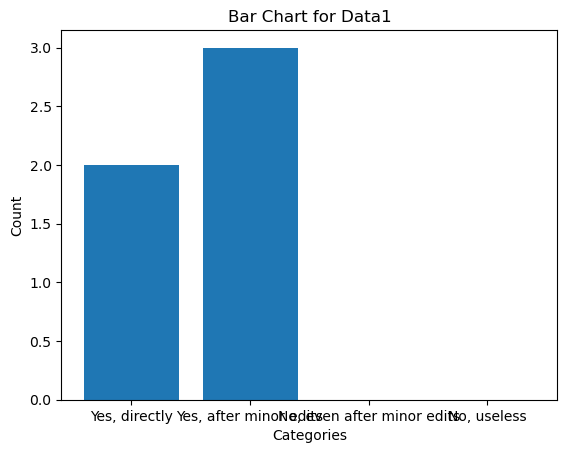

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# “Yes, directly”, “Yes, after minor edits”, “No, even after minor edits”, “No, useless”, and "I don't know"
# Given data
ONA = ['Yes, after minor edits', 'Yes, after minor edits', 'Yes, directly', 'Yes, directly', 'Yes, after minor edits']
ORM = ['Yes, after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits']
NARM = ['Yes, after minor edits', 'Yes, directly', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits' ]
gold = ['Yes, after minor edits', 'No, useless', 'No, even after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits']
suggested = ['No, even after minor edits', 'Yes, after minor edits', 'No, even after minor edits', 'No, useless', 'No, even after minor edits', 'Yes, after minor edits']



# Define all possible categories
all_categories = ['Yes, directly', 'Yes, after minor edits', 'No, even after minor edits', 'No, useless']

# Count the occurrences of each unique value
data_counts = Counter(ONA)

# Ensure that all categories have counts (even if zero)
counts = [data_counts.get(category, 0) for category in all_categories]

# Create a bar chart
plt.bar(all_categories, counts)


# Add labels and a title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart for Data1')

# Show the chart
plt.show()
d

['Yes, directly', 'Yes, after minor edits']
Counter({'Yes, after minor edits': 3, 'Yes, directly': 2})
[2, 3]
split
['Yes, directly', 'Yes, after minor edits']
['No, even after minor edits', 'Yes, after minor edits']
Counter({'Yes, after minor edits': 4, 'No, even after minor edits': 2})
[2, 4]
split
['No, even after minor edits', 'Yes, after minor edits']
['Yes, directly', 'Yes, after minor edits']
Counter({'Yes, after minor edits': 4, 'Yes, directly': 1})
[1, 4]
split
['Yes, directly', 'Yes, after minor edits']
['No, even after minor edits', 'No, useless', 'Yes, after minor edits']
Counter({'No, even after minor edits': 3, 'Yes, after minor edits': 2, 'No, useless': 1})
[3, 1, 2]
split
['No, even after minor edits', 'No, useless', 'Yes, after minor edits']
['No, even after minor edits', 'No, useless', 'Yes, after minor edits']
Counter({'No, even after minor edits': 3, 'Yes, after minor edits': 2, 'No, useless': 1})
[3, 1, 2]
split
['No, even after minor edits', 'No, useless', 'Yes, a

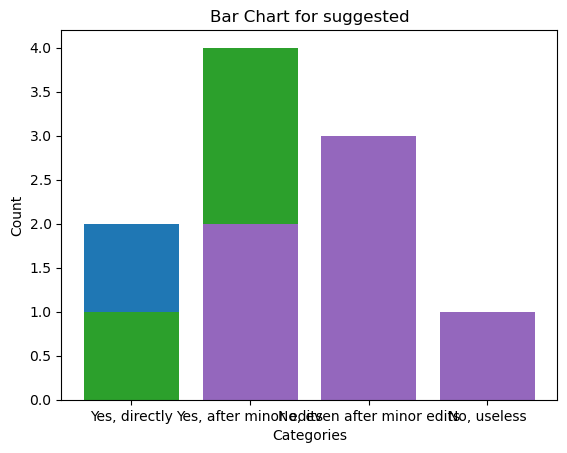

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

datasets = {
    'ONA' : ['Yes, after minor edits', 'Yes, after minor edits', 'Yes, directly', 'Yes, directly', 'Yes, after minor edits'],
'ORM' : ['Yes, after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits'],
'NARM' : ['Yes, after minor edits', 'Yes, directly', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits' ],
'gold' : ['Yes, after minor edits', 'No, useless', 'No, even after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits'],
'suggested' : ['No, even after minor edits', 'Yes, after minor edits', 'No, even after minor edits', 'No, useless', 'No, even after minor edits', 'Yes, after minor edits']

    
}

for dataset_name, data in datasets.items():
    # Define all possible categories
    all_categories = list(set(data))
    print(all_categories)
    # Count the occurrences of each unique value
    print(Counter(data))
    data_counts = Counter(data)

    # Ensure that all categories have counts (even if zero)
    counts = [data_counts.get(category, 0) for category in all_categories]
    print(counts)
    print('split')
    print(all_categories)
    # Create a bar chart
    plt.bar(all_categories, counts)

    # Add labels and a title
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {dataset_name}')

    # Show the chart

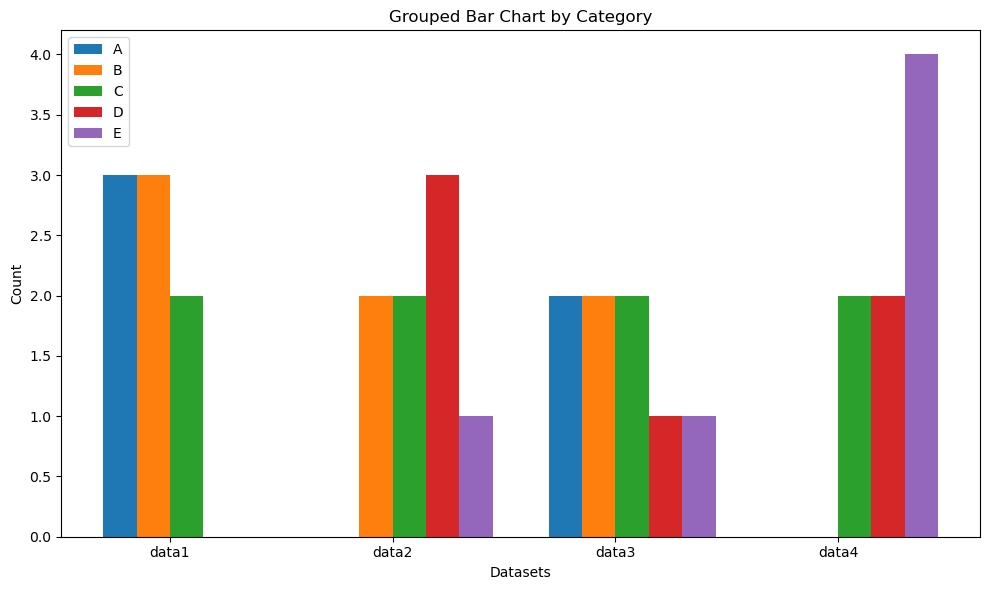

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the datasets
datasets = {
    'data1': ['A', 'B', 'C', 'A', 'B', 'A', 'C', 'B'],
    'data2': ['B', 'C', 'D', 'D', 'E', 'B', 'C', 'D'],
    'data3': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'E'],
    'data4': ['C', 'C', 'D', 'D', 'E', 'E', 'E', 'E']
}

# Define the categories and sort them
categories = sorted(list(set(val for dataset in datasets.values() for val in dataset)))
num_datasets = len(datasets)

# Prepare data for grouped bar chart
data_counts = {dataset_name: Counter(data) for dataset_name, data in datasets.items()}

# Ensure that each category has the same length (pad with zeros for missing values)
counts = {category: [data_counts[dataset_name].get(category, 0) for dataset_name in datasets] for category in categories}

# Create a grouped bar chart
width = 0.15  # Width of each bar
x = np.arange(len(datasets))

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, category in enumerate(categories):
    plt.bar(x + i * width, counts[category], width=width, label=category)

# Add labels and a title
plt.xlabel('Datasets')
plt.ylabel('Count')
plt.title('Grouped Bar Chart by Category')
plt.xticks(x + (width * (num_datasets - 1)) / 2, datasets.keys())
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


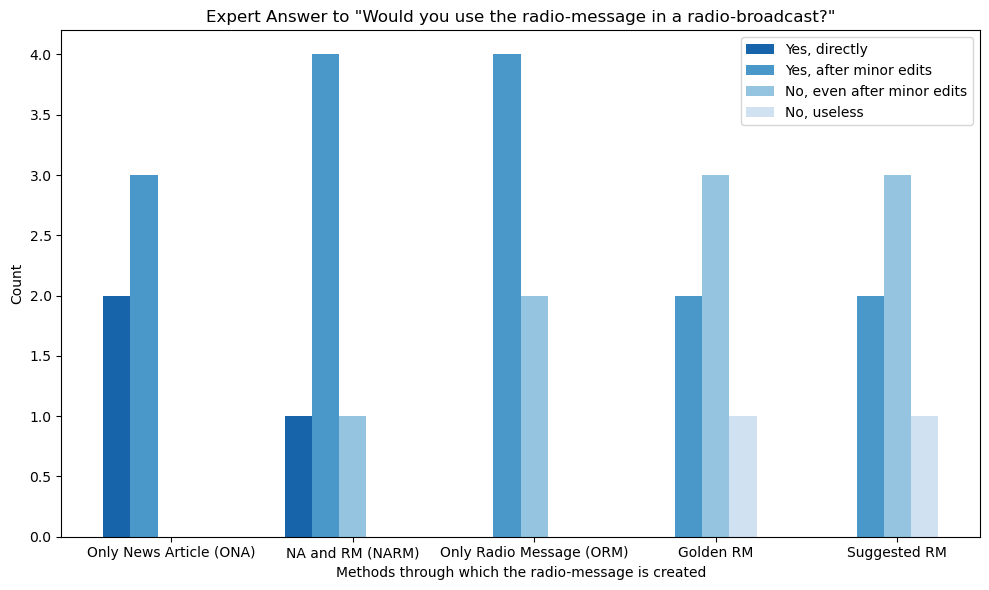

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the datasets
datasets = {
    'Only News Article (ONA)' : ['Yes, after minor edits', 'Yes, after minor edits', 'Yes, directly', 'Yes, directly', 'Yes, after minor edits'],
    'NA and RM (NARM)' : ['Yes, after minor edits', 'Yes, directly', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits' , 'No, even after minor edits'],
'Only Radio Message (ORM)' : ['Yes, after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits', 'Yes, after minor edits', 'Yes, after minor edits'],

'Golden RM' : ['Yes, after minor edits', 'No, useless', 'No, even after minor edits', 'No, even after minor edits', 'No, even after minor edits', 'Yes, after minor edits'],
'Suggested RM' : ['No, even after minor edits', 'Yes, after minor edits', 'No, even after minor edits', 'No, useless', 'No, even after minor edits', 'Yes, after minor edits']

    
}

# custom_colors = {
#     'Yes, directly' : 'green',
#     'Yes, after minor edits': 'blue',
#     'No, even after minor edits': 'orange',
#     'No, useless': 'red'
# }

# Define the categories
#categories = list(set(val for dataset in datasets.values() for val in dataset))
categories = ['Yes, directly', 'Yes, after minor edits', 'No, even after minor edits', 'No, useless']
num_datasets = len(datasets)


# Define a blue shades color palette using a color map
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(0.8, 0.2, len(categories)))  # Adjust the range as needed



# Prepare data for grouped bar chart
data_counts = {dataset_name: Counter(data) for dataset_name, data in datasets.items()}

# Ensure that each category has the same length (pad with zeros for missing values)
counts = {category: [data_counts[dataset_name].get(category, 0) for dataset_name in datasets] for category in categories}

# Create a grouped bar chart
width = 0.15  # Width of each bar
x = np.arange(len(datasets))

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, category in enumerate(categories):
    plt.bar(x + i * width, counts[category], width=width, label=category,  color=colors[i])

# Add labels and a title
plt.xlabel('Methods through which the radio-message is created')
plt.ylabel('Count')
plt.title('Expert Answer to "Would you use the radio-message in a radio-broadcast?"')
plt.xticks(x + (width * (num_datasets - 1)) / 2, datasets.keys())
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()
